In [225]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
loan_data = pd.read_csv("Loan_dataset.csv")

In [227]:
loan_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [228]:
loan_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [229]:
loan_data.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [230]:
loan_data.shape

(255347, 18)

In [231]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [232]:
null_values = loan_data.isnull().sum()

In [233]:
null_values

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [234]:
duplicate_values = loan_data.duplicated().sum()

In [235]:
duplicate_values

0

In [236]:
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [237]:
#Data cleaning
loan_data["Age"].value_counts()


Age
55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
22    4970
32    4969
43    4965
19    4963
35    4961
68    4958
38    4955
30    4954
49    4952
50    4949
27    4945
47    4931
57    4925
54    4921
31    4908
44    4906
36    4906
28    4906
56    4902
26    4891
21    4889
46    4887
18    4884
58    4883
67    4876
51    4876
59    4871
24    4869
29    4865
63    4862
20    4861
37    4856
66    4841
25    4840
64    4840
69    4817
41    4815
48    4810
42    4803
60    4772
52    4748
23    4740
Name: count, dtype: int64

In [238]:
loan_data["Income"].value_counts()

Income
69492     10
117102    10
121985    10
85375      9
61315      9
          ..
98969      1
72350      1
126600     1
68356      1
124446     1
Name: count, Length: 114620, dtype: int64

In [239]:
loan_data["Income"].unique

<bound method Series.unique of 0         85994
1         50432
2         84208
3         31713
4         20437
          ...  
255342    37979
255343    51953
255344    84820
255345    85109
255346    22418
Name: Income, Length: 255347, dtype: int64>

In [240]:
loan_data["CreditScore"].value_counts()

CreditScore
630    528
445    521
829    520
753    519
670    515
      ... 
629    408
706    406
536    406
720    402
724    392
Name: count, Length: 550, dtype: int64

In [241]:
loan_data["CreditScore"].isnull().sum()

0

In [242]:
loan_data["NumCreditLines"].value_counts()

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

In [243]:
loan_data.drop(["LoanID"], axis=1, inplace=True)

In [244]:
#Drop rows containing any missing value un any column
loan_data.dropna(inplace=True)

In [245]:
#Filling the missing values
loan_data["Income"].fillna(loan_data["Income"].mean(), inplace=True)

In [246]:
#For categorical columns

loan_data["Education"].fillna(loan_data["Education"].mode()[0], inplace=True)

In [247]:
loan_data["EmploymentType"].fillna(loan_data["EmploymentType"].mode()[0], inplace=True)

In [248]:
loan_data.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [249]:
import missingno as msno

In [250]:
#Missing values are clear]
#msno.matrix(data)
#plt.show()

In [251]:
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


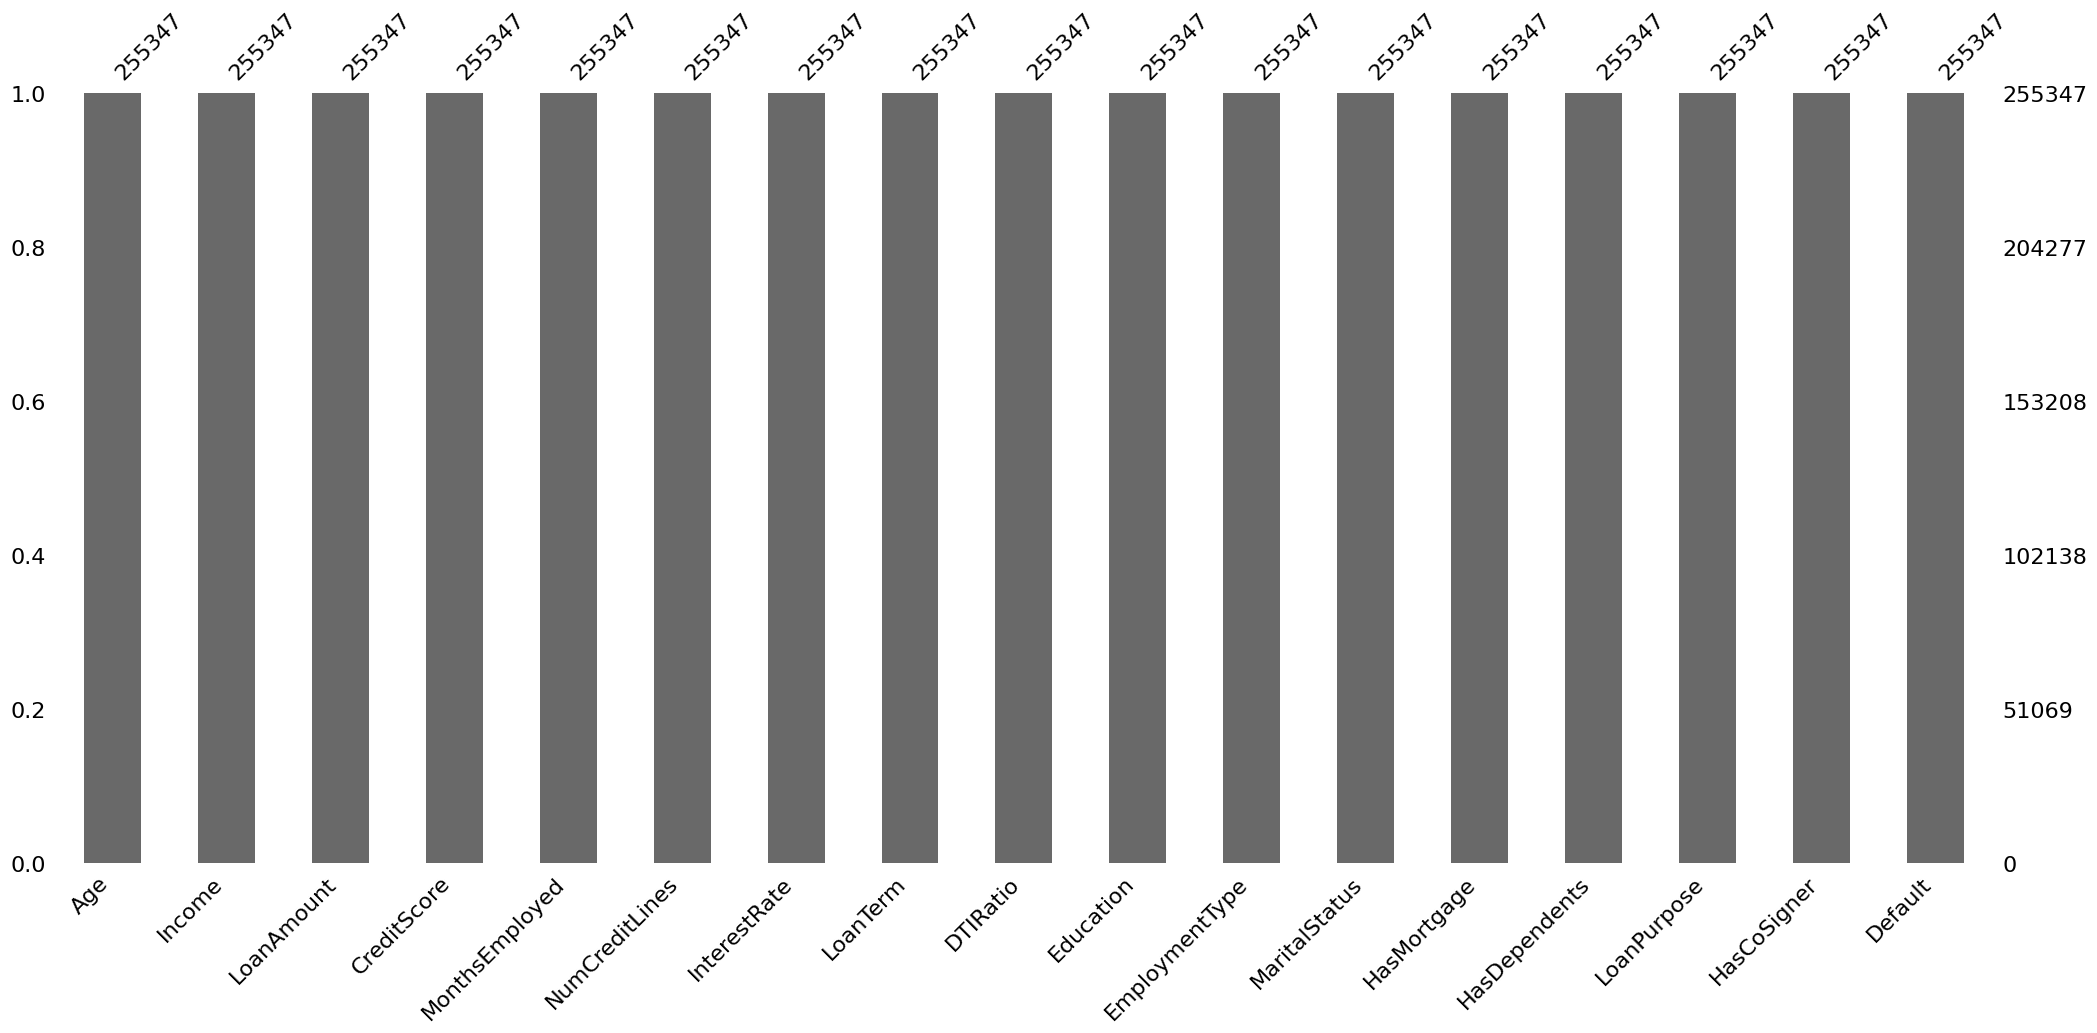

In [252]:
msno.bar(loan_data)
plt.show()

In [253]:
#checking incorrect values
loan_data.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [254]:
loan_data["HasCoSigner"].unique()

array(['Yes', 'No'], dtype=object)

In [255]:
#Data Transformation
#For simplicity, let's fill missing numerical values with mean and missing categorical values with mode

numerical_cols = loan_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = loan_data.select_dtypes(include=['object']).columns

In [256]:
numerical_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

In [257]:
categorical_cols

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [258]:
#Converting categorical columns into dummies
#Using Label Encoder

from sklearn.preprocessing import LabelEncoder

In [259]:
label_encoder = LabelEncoder()

In [260]:
loan_data["Education"] = label_encoder.fit_transform(loan_data["Education"])

In [261]:
#Applying One Hot Encoding to get "EmploymentType" column

loan_data = pd.get_dummies(loan_data, columns=['EmploymentType'], drop_first=True)

In [262]:
loan_data = pd.get_dummies(loan_data, columns=['MaritalStatus', 'LoanPurpose'], drop_first=True)

In [263]:
loan_data = pd.get_dummies(loan_data, columns=['HasMortgage', 'HasDependents', 'HasCoSigner'], drop_first=True) 

In [264]:
loan_data["Education"].value_counts()

Education
0    64366
1    63903
2    63541
3    63537
Name: count, dtype: int64

In [265]:
loan_data["MaritalStatus_Married"].value_counts()

MaritalStatus_Married
False    170045
True      85302
Name: count, dtype: int64

In [266]:
#Calculating Average loan amount by Education level
avg_loan_by_education = loan_data.groupby('Education')['LoanAmount'].mean()
avg_loan_by_education

Education
0    127390.632026
1    127393.676823
2    127710.986450
3    127823.681178
Name: LoanAmount, dtype: float64

In [267]:
loan_data["MaritalStatus_Single"].value_counts()

MaritalStatus_Single
False    170335
True      85012
Name: count, dtype: int64

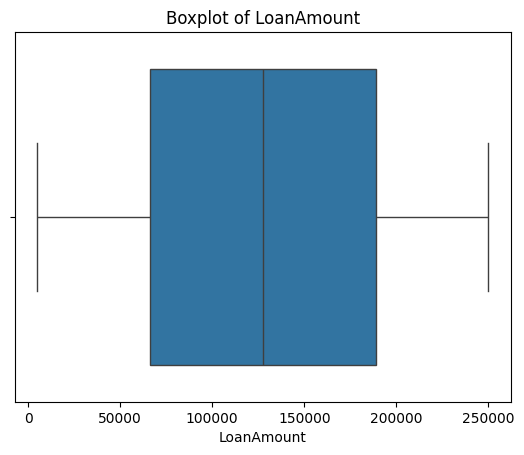

In [268]:
#Data Visualization
#Box plot

sns.boxplot(x=loan_data["LoanAmount"])
plt.title("Boxplot of LoanAmount")
plt.show()

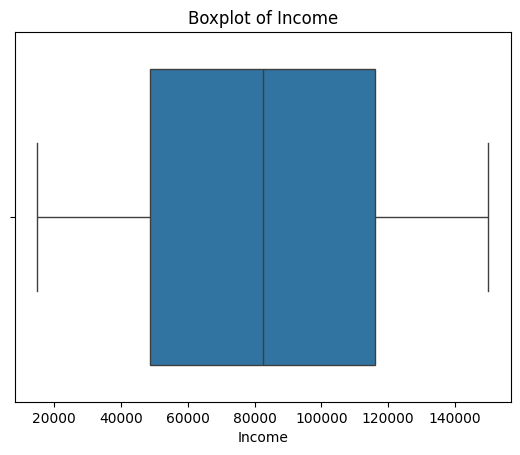

In [269]:
sns.boxplot(x=loan_data["Income"])
plt.title("Boxplot of Income")
plt.show()

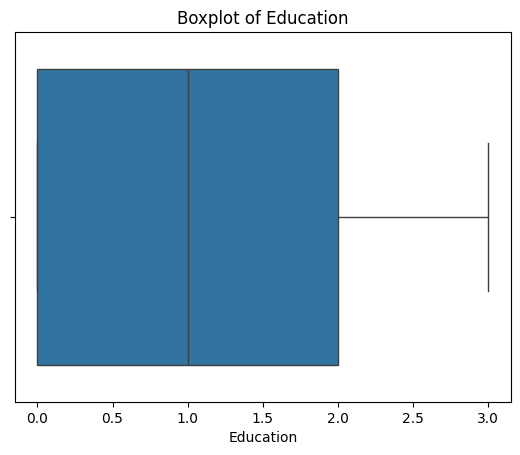

In [270]:
sns.boxplot(x=loan_data["Education"])
plt.title("Boxplot of Education")
plt.show()

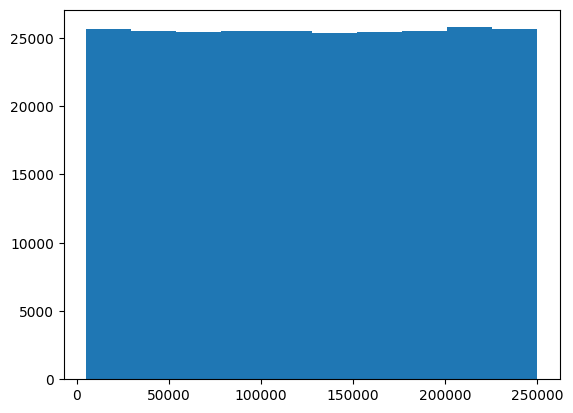

In [271]:
#histogram plot
plt.hist(loan_data["LoanAmount"], bins=10)
plt.show()

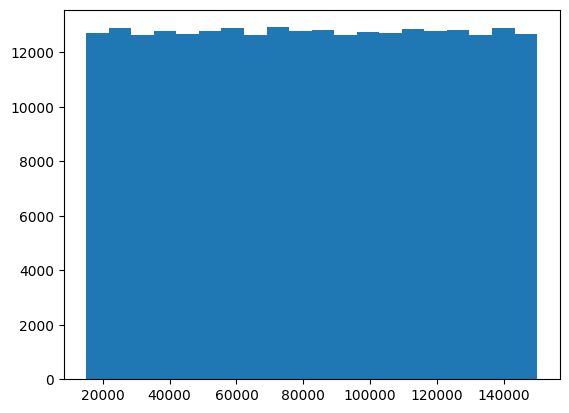

In [272]:
plt.hist(loan_data["Income"], bins=20)
plt.show()

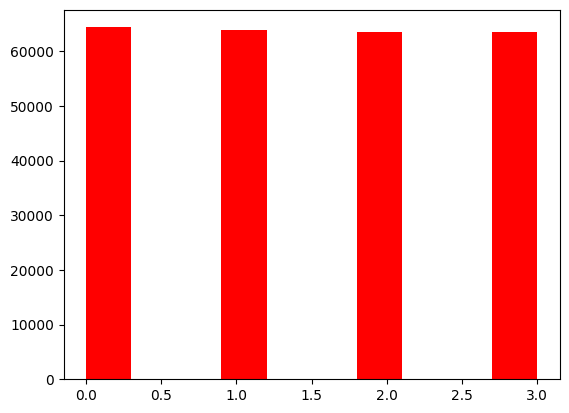

In [273]:
plt.hist(loan_data["Education"], color="Red")
plt.show()

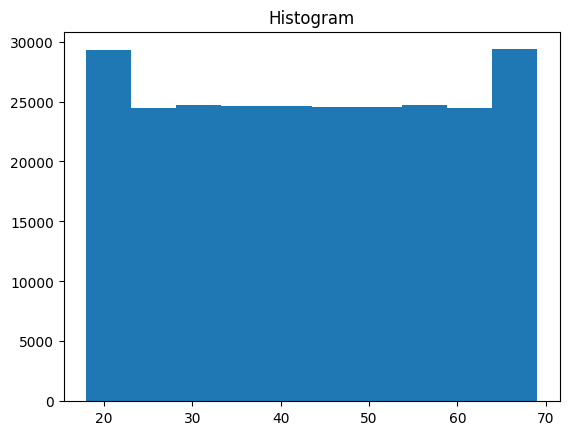

In [274]:
plt.hist(loan_data["Age"])
plt.title("Histogram")
plt.show()

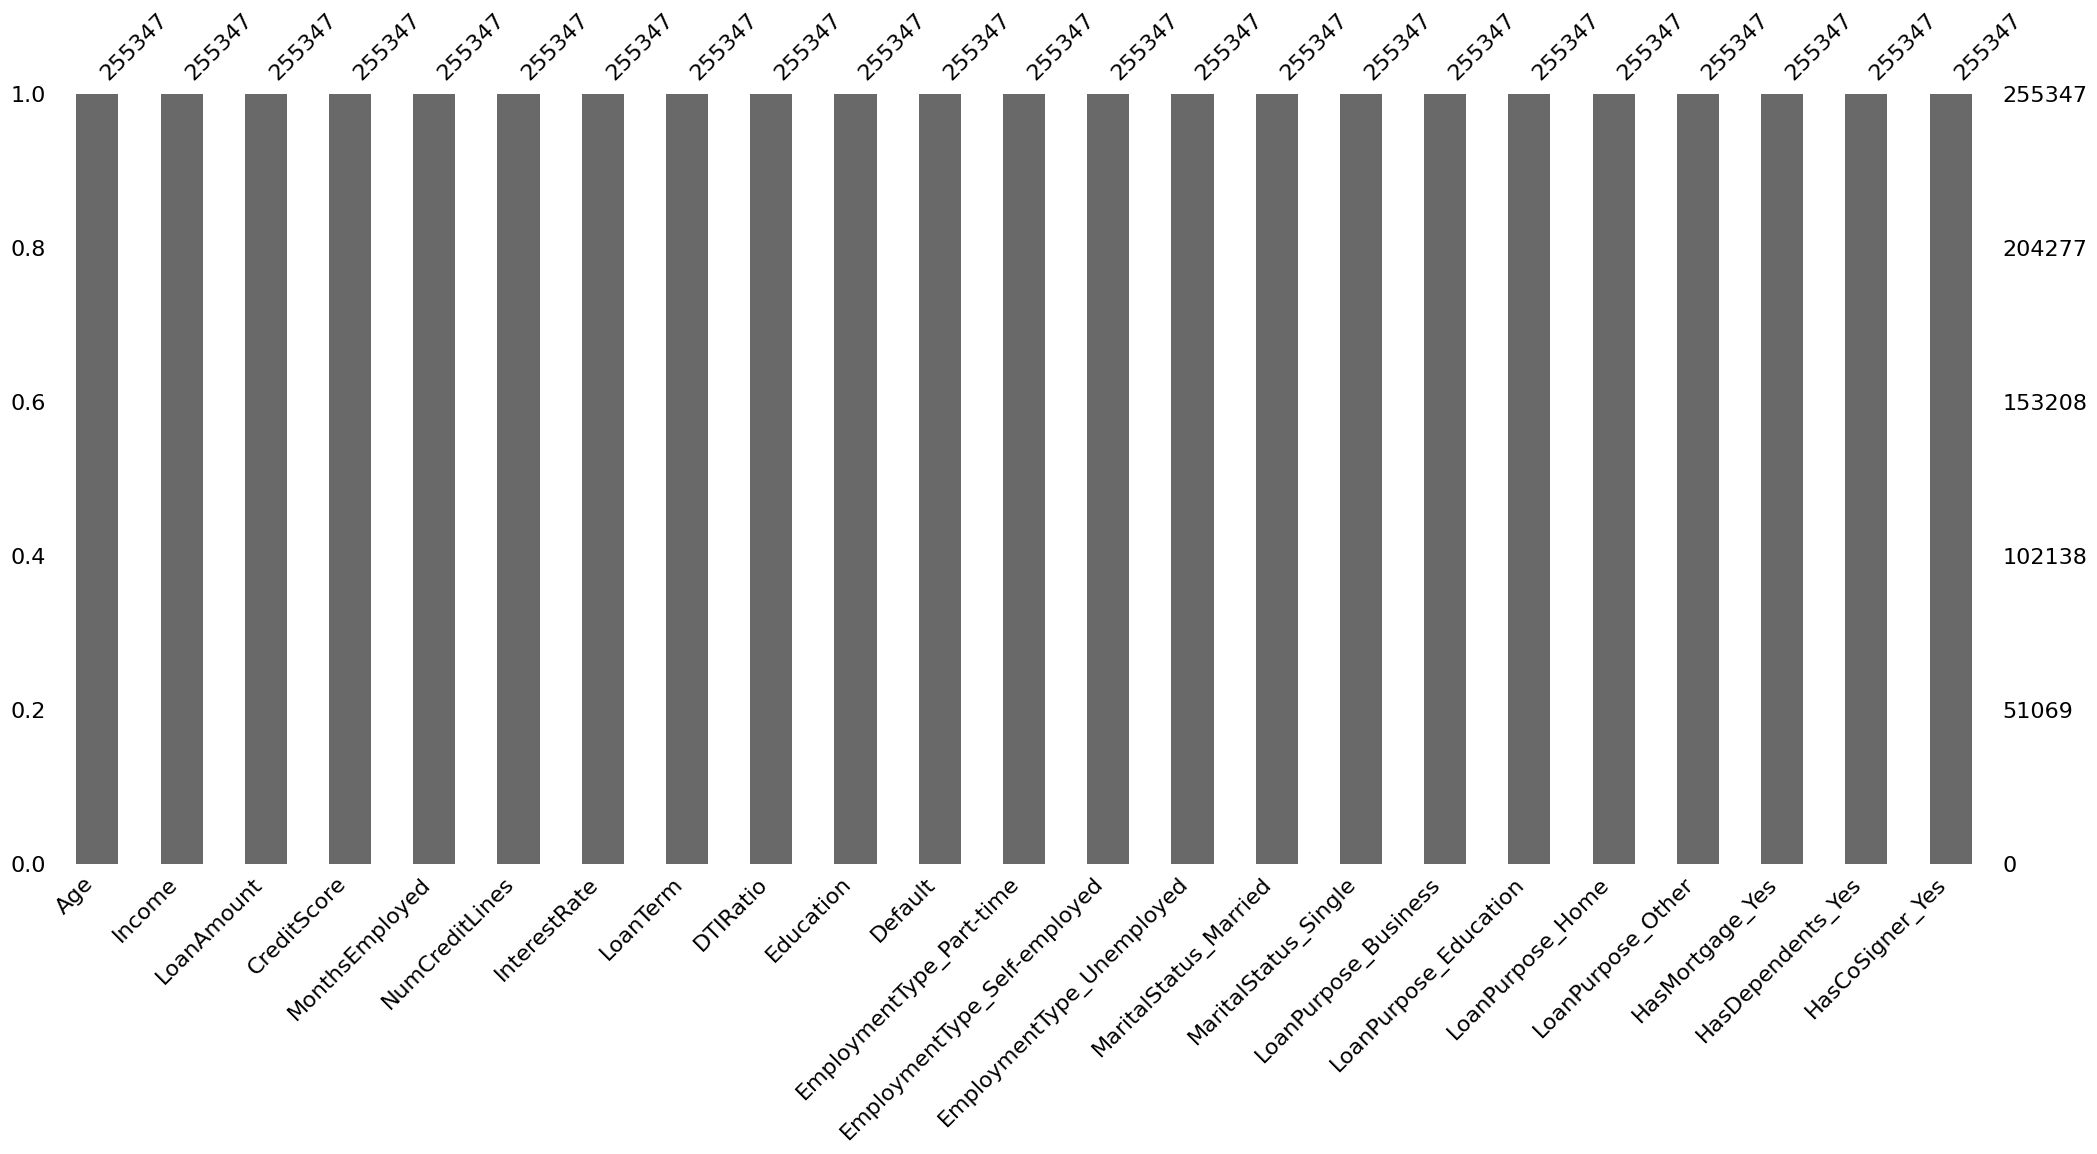

In [275]:
msno.bar(loan_data)
plt.show()

In [276]:
loan_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,False,False,False,True,True,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,False,True,False,False,False,False,True,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,True,False,False,False,False,False,False,True,True,False
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,False,True,False,True,False,False,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,False,True,False,False,False,False,True,False,False,False
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,False,False,False,False,False,True,False,False,False,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,...,False,True,False,False,False,False,False,True,True,True
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,...,False,False,True,False,False,False,True,True,True,False


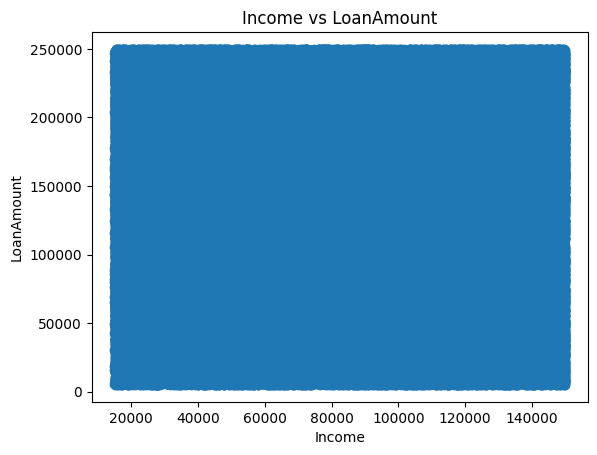

In [277]:
#Scatter plot
plt.scatter(x="Income", y="LoanAmount", data=loan_data)
plt.xlabel('Income')
plt.ylabel('LoanAmount')
plt.title("Income vs LoanAmount")
plt.show()

In [278]:
#Implementing Standardization by converting numerical the numerical columns
#from sklearn.preprocessing import StandardScalar
#numerical_cols = loan_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [279]:
#scalar = StandardScalar()

In [280]:
#Apply Standard Scalar to numerical columns
#loan_data[numerical_cols] = scalar.fit_transform(loan_data[numerical_cols])

In [281]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Education                     255347 non-null  int32  
 10  Default                       255347 non-null  int64  
 11  EmploymentType_Part-time      255347 non-null  bool   
 12  EmploymentType_Self-employed  255347 non-nul

In [282]:
loan_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,False,False,False,True,True,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,False,True,False,False,False,False,True,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,True,False,False,False,False,False,False,True,True,False
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,False,True,False,True,False,False,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,False,True,False,False,False,False,True,False,False,False
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,False,False,False,False,False,True,False,False,False,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,...,False,True,False,False,False,False,False,True,True,True
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,...,False,False,True,False,False,False,True,True,True,False


In [283]:
x = loan_data.drop(columns=['Default'])
y = loan_data["Default"] #as Target column

In [284]:
loan_data["Default"].unique()

array([0, 1], dtype=int64)

In [285]:
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,False,False,False,True,True,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,False,True,False,False,False,False,True,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,True,False,False,False,False,False,False,True,True,False
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,False,True,False,True,False,False,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,False,False,False,False,True,False


In [286]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [287]:
#Use of Resampling- to increase the duplicate values we use oversampling

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_sampled, y_sampled = over_sampler.fit_resample(x,y)

In [288]:
print(x_sampled.shape)
print(y_sampled.shape)

(451388, 22)
(451388,)


In [289]:
x_sampled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,False,False,False,True,True,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,False,True,False,False,False,False,True,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,True,False,False,False,False,False,False,True,True,False
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,False,True,False,True,False,False,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,False,False,False,False,True,False


In [290]:
y_sampled.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [291]:
y_sampled.value_counts()

Default
0    225694
1    225694
Name: count, dtype: int64

In [292]:
loan_data = pd.concat([x_sampled, y_sampled], axis=1)

In [293]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           451388 non-null  int64  
 1   Income                        451388 non-null  int64  
 2   LoanAmount                    451388 non-null  int64  
 3   CreditScore                   451388 non-null  int64  
 4   MonthsEmployed                451388 non-null  int64  
 5   NumCreditLines                451388 non-null  int64  
 6   InterestRate                  451388 non-null  float64
 7   LoanTerm                      451388 non-null  int64  
 8   DTIRatio                      451388 non-null  float64
 9   Education                     451388 non-null  int32  
 10  EmploymentType_Part-time      451388 non-null  bool   
 11  EmploymentType_Self-employed  451388 non-null  bool   
 12  EmploymentType_Unemployed     451388 non-nul

In [294]:
loan_data.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes,Default
Age,1.000000,0.013305,-0.016594,0.005363,0.023251,-0.003925,-0.036832,-0.004281,-0.008632,0.004991,...,0.012528,-0.008542,-0.005137,-0.002212,0.007488,0.004546,0.002565,0.009524,0.007964,-0.262618
Income,0.013305,1.000000,-0.069572,-0.002138,0.007928,-0.003425,-0.014017,-0.000014,-0.000637,0.001310,...,0.000828,-0.001206,0.007775,-0.004889,0.001865,-0.003200,0.000680,0.002819,-0.002286,-0.151394
LoanAmount,-0.016594,-0.069572,1.000000,-0.001435,-0.007687,0.004323,0.006845,-0.002009,-0.000024,0.001908,...,-0.000909,-0.005448,-0.003199,-0.001154,-0.002319,0.002247,-0.000940,0.000052,-0.006820,0.135371
CreditScore,0.005363,-0.002138,-0.001435,1.000000,0.004404,0.001871,-0.006237,-0.001404,0.000228,-0.000965,...,-0.001399,-0.000144,-0.002039,-0.000213,-0.000051,0.002679,0.003230,-0.004961,0.002343,-0.052200
MonthsEmployed,0.023251,0.007928,-0.007687,0.004404,1.000000,-0.002269,-0.015593,-0.002725,-0.001941,0.001757,...,0.004815,0.004481,-0.004240,0.001792,0.000459,-0.001469,0.003495,0.003249,0.007647,-0.151503
NumCreditLines,-0.003925,-0.003425,0.004323,0.001871,-0.002269,1.000000,0.005001,-0.002476,-0.001879,0.003165,...,-0.001564,0.000936,0.001097,0.006152,-0.001155,-0.001403,-0.002408,0.005070,0.002314,0.043870
InterestRate,-0.036832,-0.014017,0.006845,-0.006237,-0.015593,0.005001,1.000000,0.002614,0.004473,-0.003750,...,-0.006068,-0.007138,0.000545,0.003305,0.000738,-0.004095,-0.003057,-0.004801,-0.010698,0.205668
LoanTerm,-0.004281,-0.000014,-0.002009,-0.001404,-0.002725,-0.002476,0.002614,1.000000,0.004432,-0.002838,...,0.000495,0.001325,-0.004512,0.000879,0.000796,0.002055,0.003262,0.005128,-0.001671,0.000055
DTIRatio,-0.008632,-0.000637,-0.000024,0.000228,-0.001941,-0.001879,0.004473,0.004432,1.000000,0.000434,...,0.002691,0.003338,-0.000034,0.004588,-0.000798,-0.004286,-0.002397,-0.000531,-0.001583,0.030191
Education,0.004991,0.001310,0.001908,-0.000965,0.001757,0.003165,-0.003750,-0.002838,0.000434,1.000000,...,-0.000923,-0.003003,-0.004139,-0.001454,-0.001178,-0.003762,0.004668,-0.000335,0.006206,-0.036921


<Axes: >

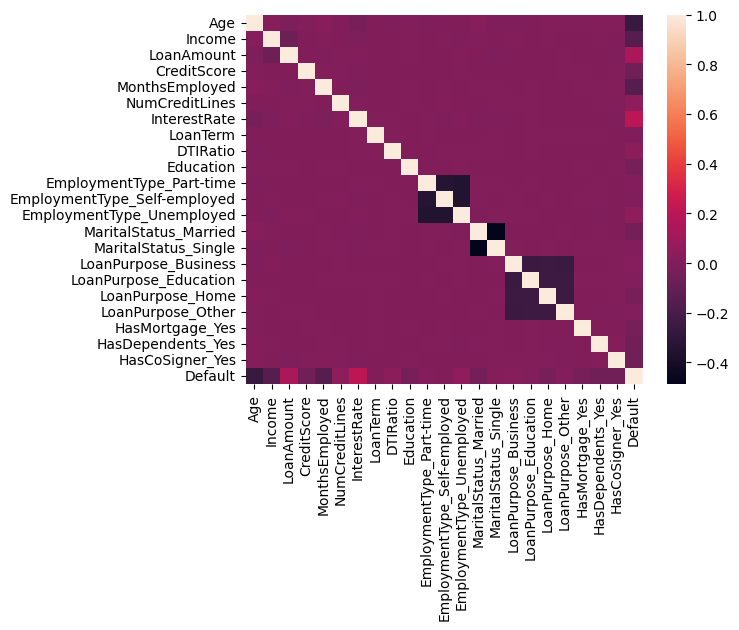

In [295]:
sns.heatmap(loan_data.corr())

In [296]:
loan_data.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'HasMortgage_Yes',
       'HasDependents_Yes', 'HasCoSigner_Yes', 'Default'],
      dtype='object')

In [297]:
#Train Test split

x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.75, random_state=23)

In [298]:
from sklearn.preprocessing import StandardScaler

In [299]:
scaler = StandardScaler()

In [300]:
x_tr_sc = scaler.fit_transform(x_train)
x_te_sc = scaler.fit_transform(x_test)

In [301]:
x_tr_sc

array([[-1.37682436, -0.68422462, -1.07955837, ..., -0.97371632,
        -0.9561137 ,  1.05216198],
       [ 1.90537265, -0.52331484,  1.11161   , ..., -0.97371632,
         1.04590071,  1.05216198],
       [-0.23810295, -0.87604883, -1.53423936, ..., -0.97371632,
        -0.9561137 ,  1.05216198],
       ...,
       [-1.10888991, -1.43038787, -1.63473664, ...,  1.02699316,
         1.04590071,  1.05216198],
       [ 0.16379873,  1.61075449, -0.6609468 , ..., -0.97371632,
        -0.9561137 , -0.950424  ],
       [-1.0419063 ,  1.24564475, -0.30182014, ...,  1.02699316,
         1.04590071,  1.05216198]])

In [302]:
#Applying Model: Random Forest

from sklearn.ensemble import RandomForestClassifier

In [303]:
model = RandomForestClassifier()

In [304]:
model.fit(x_tr_sc, y_train)

RandomForestClassifier()

In [305]:
model.score(x_tr_sc, y_train)

0.999982276888176

In [306]:
pred = model.predict(x_te_sc)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [307]:
#Finding Accuracy
accuracy_score(y_test, pred)


0.8915611403050148

In [308]:
confusion_matrix(y_test, pred)

array([[147476,  21698],
       [ 15013, 154354]], dtype=int64)

In [309]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89    169174
           1       0.88      0.91      0.89    169367

    accuracy                           0.89    338541
   macro avg       0.89      0.89      0.89    338541
weighted avg       0.89      0.89      0.89    338541



In [310]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression

In [311]:
lg = LogisticRegression()

In [312]:
lg.fit(x_tr_sc, y_train)

LogisticRegression()

In [313]:
lg.score(x_tr_sc, y_train)

0.6807447251588434

In [314]:
pred1 = lg.predict(x_te_sc)

In [315]:
pred1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [316]:
accuracy_score(y_test, pred1)

0.6816515577138367

In [317]:
#KNN:

from sklearn.neighbors import KNeighborsClassifier

In [318]:
knn = KNeighborsClassifier()

In [319]:
knn.fit(x_tr_sc, y_train)

KNeighborsClassifier()

In [320]:
knn.score(x_tr_sc, y_train)

0.8022100720444496

In [321]:
pred2 = knn.predict(x_te_sc)

In [322]:
pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [323]:
accuracy_score(y_test, pred2)

0.6914613001084063

In [324]:
#PCA

from sklearn.decomposition import PCA

In [325]:
loan_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,False,False,True,True,True,True,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,True,False,False,False,False,True,False,False,True,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,False,False,False,False,False,False,True,True,False,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,True,False,True,False,False,False,False,False,False,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,False,False,False,False,False,True,False,0


In [326]:
pca = PCA(n_components=5)

In [327]:
loan_data2 = pca.fit_transform(loan_data.drop("Default", axis=1))

In [328]:
loan_data2

array([[ 8.46765118e+04,  3.27608816e+03, -4.81348226e+01,
         2.43635746e+01,  2.69873294e-01],
       [ 8.89012307e+03, -2.79544223e+04, -1.10246783e+02,
        -3.99273737e+01, -2.33891557e+01],
       [ 6.10380848e+03,  6.03966736e+03, -1.16928730e+02,
        -2.93903561e+01,  1.21810766e+01],
       ...,
       [ 3.43615145e+04, -5.33893749e+04, -5.05649665e+01,
        -3.72470420e+01,  2.41196488e+01],
       [ 1.98523484e+04, -4.84428240e+04, -2.15422982e+02,
         1.49251109e+01,  1.88137393e-02],
       [ 1.50414615e+04,  3.67030195e+04, -5.46974782e+01,
        -4.08270717e+01, -2.39162144e+01]])

In [329]:
x = loan_data
y = loan_data["Default"]

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45, shuffle=True, stratify=y)

In [331]:
RFC = RandomForestClassifier()

In [332]:
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [333]:
RFC.score(x_train, y_train)

1.0

In [334]:
pred3 = RFC.predict(x_test)

In [335]:
pred3

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [336]:
accuracy_score(y_test, pred3)

1.0